

## **Dataset Overview: Chocolate Sales.csv**

This dataset contains detailed information on chocolate sales. The data can be used to analyze sales performance across different regions, products, and sales representatives, as well as to forecast future sales and derive business insights. It includes transactional details such as the salesperson, country of sale, product details, date, sales amount, and shipment quantity.

---

### **Feature Summary**

1. **Sales Person**  
   - The name of the individual who made the sale.

2. **Country**  
   - The country where the sale took place.

3. **Product**  
   - The name of the chocolate product sold (e.g., Mint Chip Choco, 85% Dark Bars, Peanut Butter Cubes).

4. **Date**  
   - The date of the sale, typically formatted as day-month-year.

5. **Amount**  
   - The sales revenue for each transaction, originally represented as a string with dollar symbols and commas, which should be converted to a numeric format for analysis.

6. **Boxes Shipped**  
   - The number of boxes that were shipped for the sale.

---

# 1. Data Understanding & Cleaning

In [7]:
import pandas as pd
import numpy
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')



## Load the dataset

In [56]:
df = pd.read_csv("E:\CodeBasic & Others\Chocolate Sales.csv")

## Display basic information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [10]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## Clean 'Amount' column: remove '$' and ',' then convert to float

In [11]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574.0,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086.0,384


## Convert 'Date' column to datetime format

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [35]:
df.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [37]:
for col in df.columns:
    print(f"{col}  unique values: {df[col].nunique()}")


Sales Person  unique values: 25
Country  unique values: 6
Product  unique values: 22
Date  unique values: 168
Amount  unique values: 827
Boxes Shipped  unique values: 385
Month  unique values: 8


## Ensure numerical columns are correct data types

In [16]:
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


## Check for missing values and duplicate value

In [17]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [18]:
df.duplicated().sum()

0

## Handle missing values (can be adjusted based on strategy)

In [19]:
df.dropna(inplace=True)

## Outlier detection using Z-score

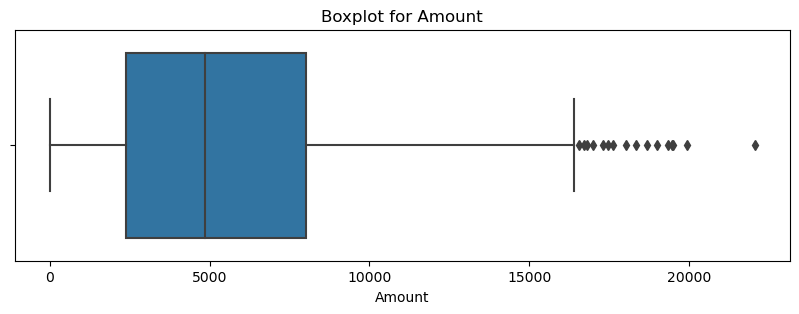

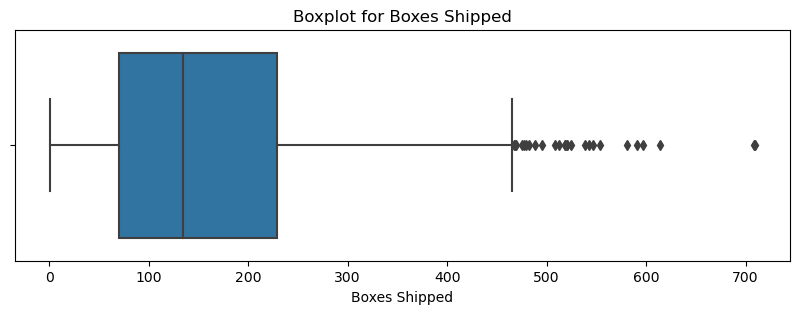

In [20]:
# Outlier find and Handle

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

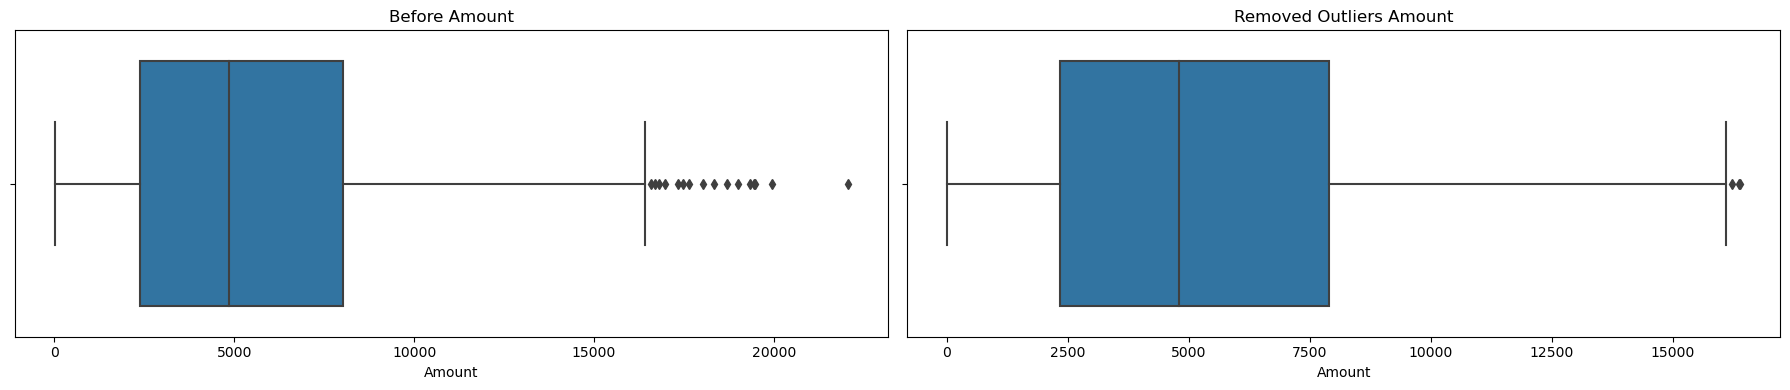

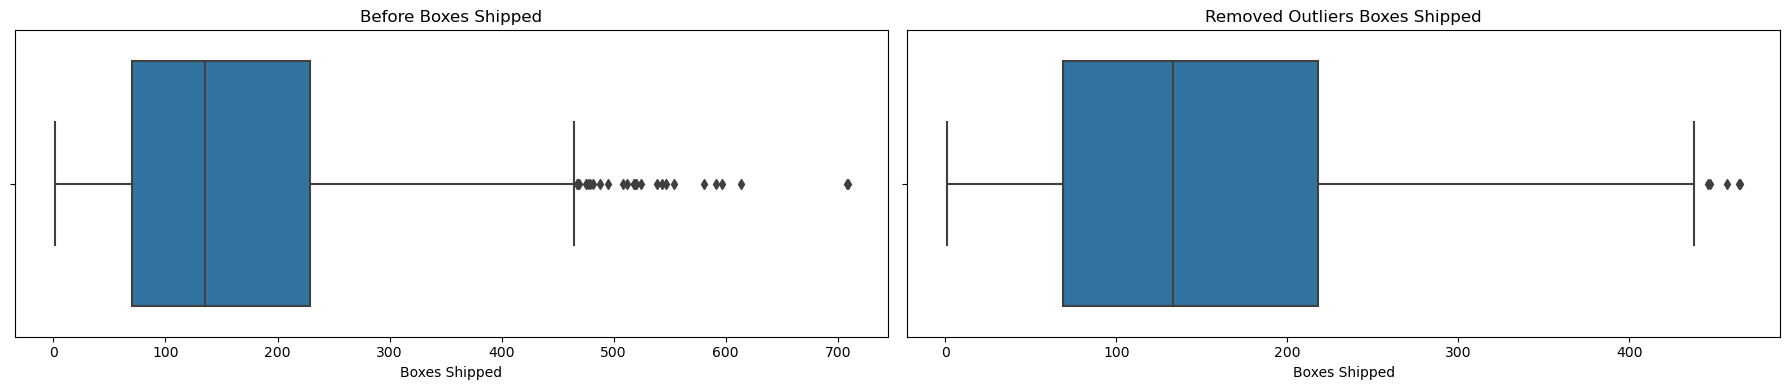

In [22]:
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4), sharey=True)

   
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Before {col}')
    axes[0].set_xlabel(col)

   
    df_no_outliers = remove_outliers(df, col)
    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[1].set_title(f'Removed Outliers {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# 2. Exploratory Data Analysis (EDA)

## General Sales Distribution

### Total sales over time

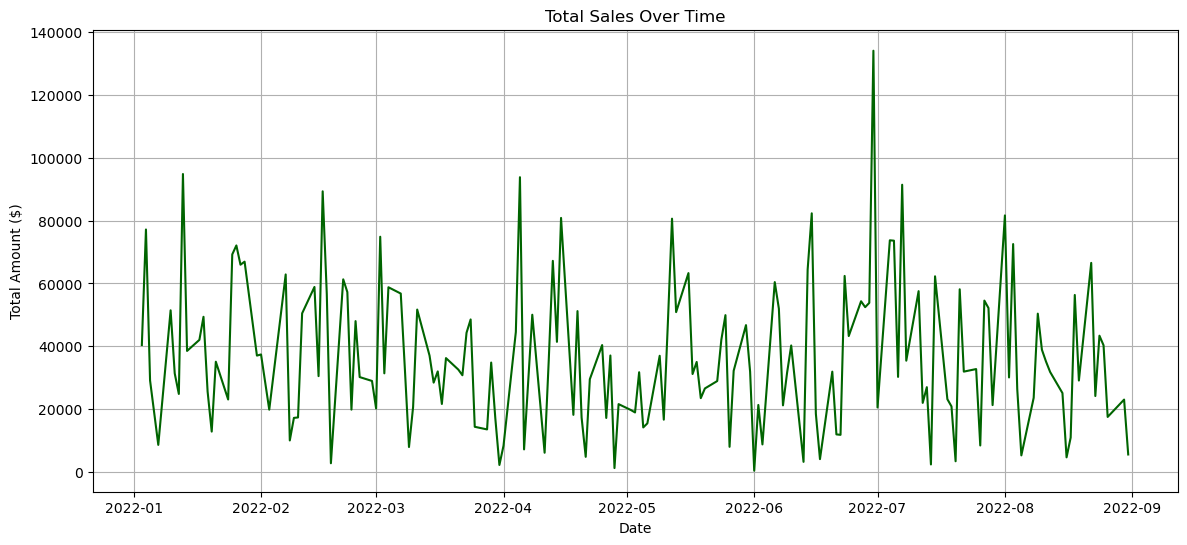

In [23]:
sales_by_date = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14, 6))
ax=sns.lineplot(data=sales_by_date, x='Date', y='Amount', color='darkgreen')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## Product Preference Analysis

### Top selling products

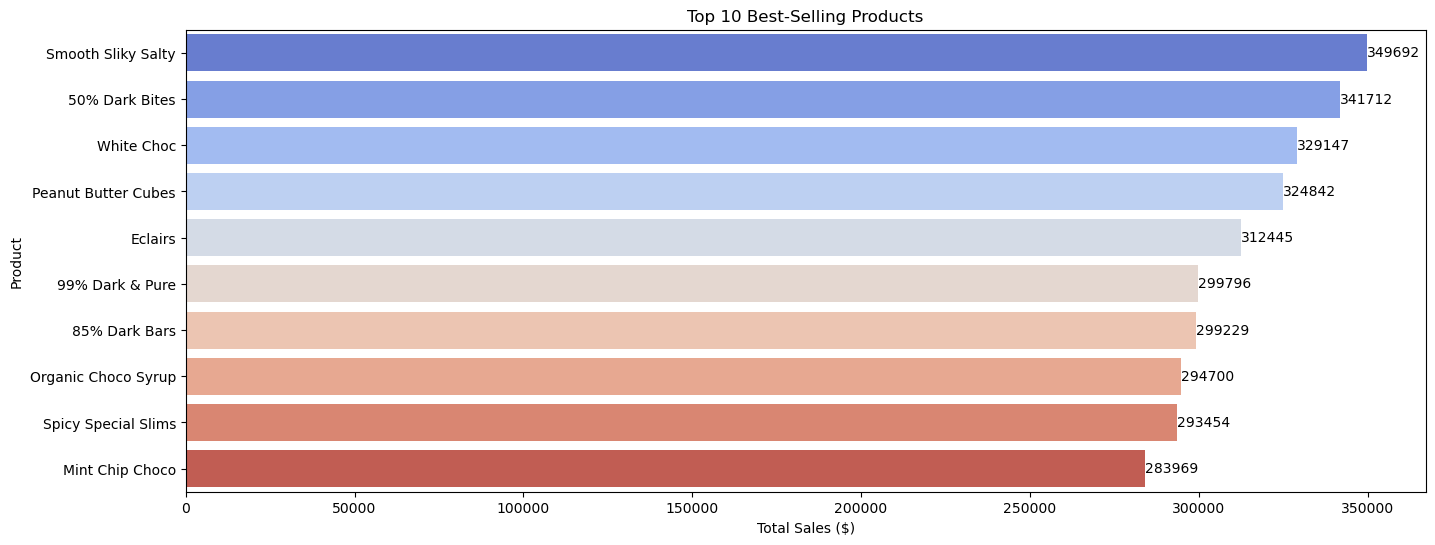

In [24]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
ax=sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Average sales per product

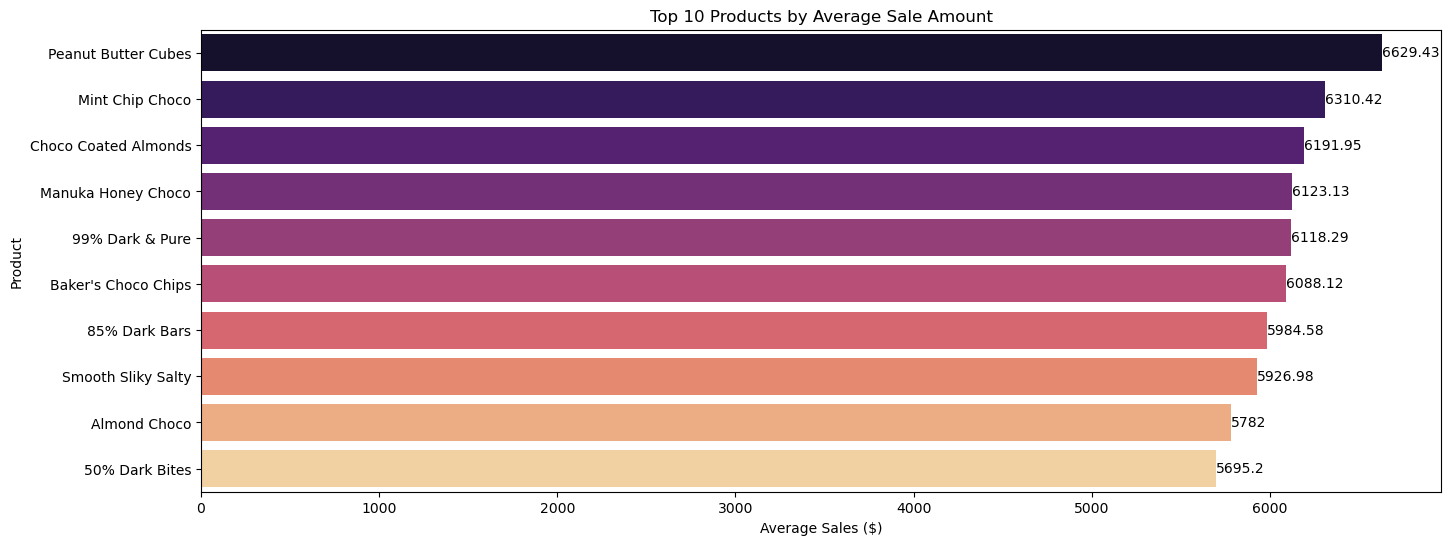

In [25]:
avg_sales_product = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
ax=sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')
plt.title('Top 10 Products by Average Sale Amount')
plt.xlabel('Average Sales ($)')
plt.ylabel('Product')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## Shipping & Logistics Analysis

### Average boxes shipped per country

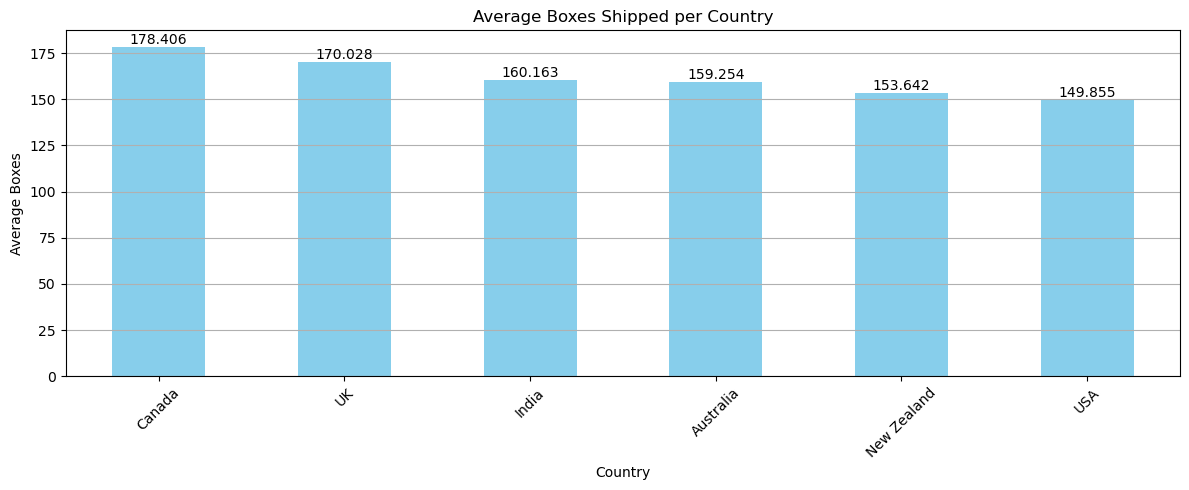

In [26]:
avg_boxes_country = df.groupby('Country')['Boxes Shipped'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
ax=avg_boxes_country.plot(kind='bar', color='skyblue')
plt.title('Average Boxes Shipped per Country')
plt.ylabel('Average Boxes')
plt.xticks(rotation=45)
plt.grid(axis='y')
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

### Scatter plot: Boxes vs Amount

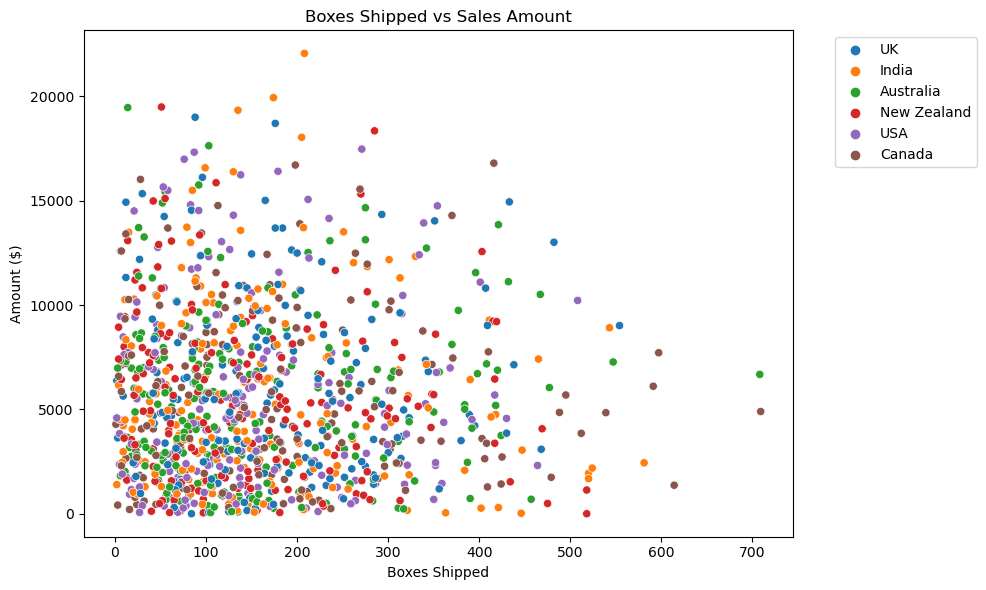

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', hue='Country')
plt.title('Boxes Shipped vs Sales Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Sales Representative Performance

### Total Sales Person

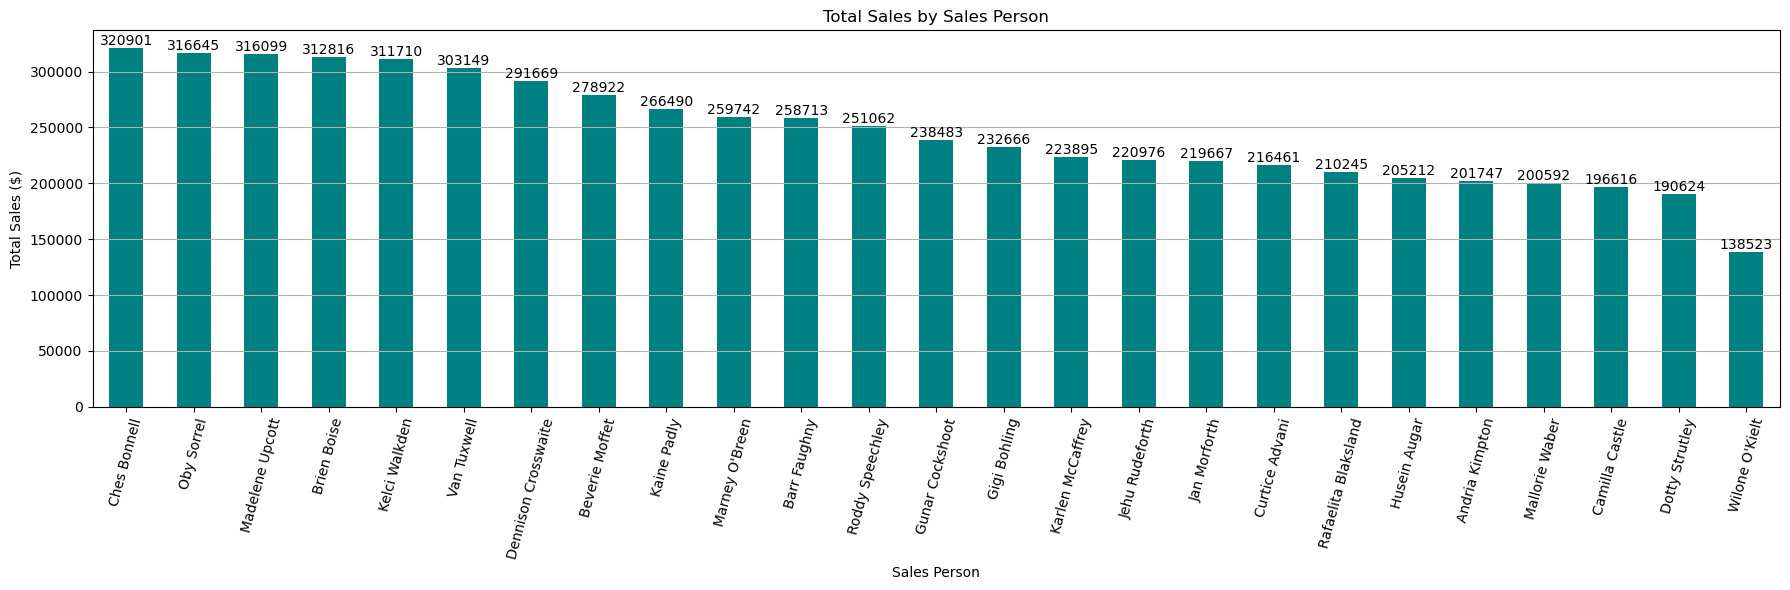

In [28]:
sales_by_rep = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(18,6))
ax=sales_by_rep.plot(kind='bar', color='teal')
plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Calculate average boxes shipped by each sales person

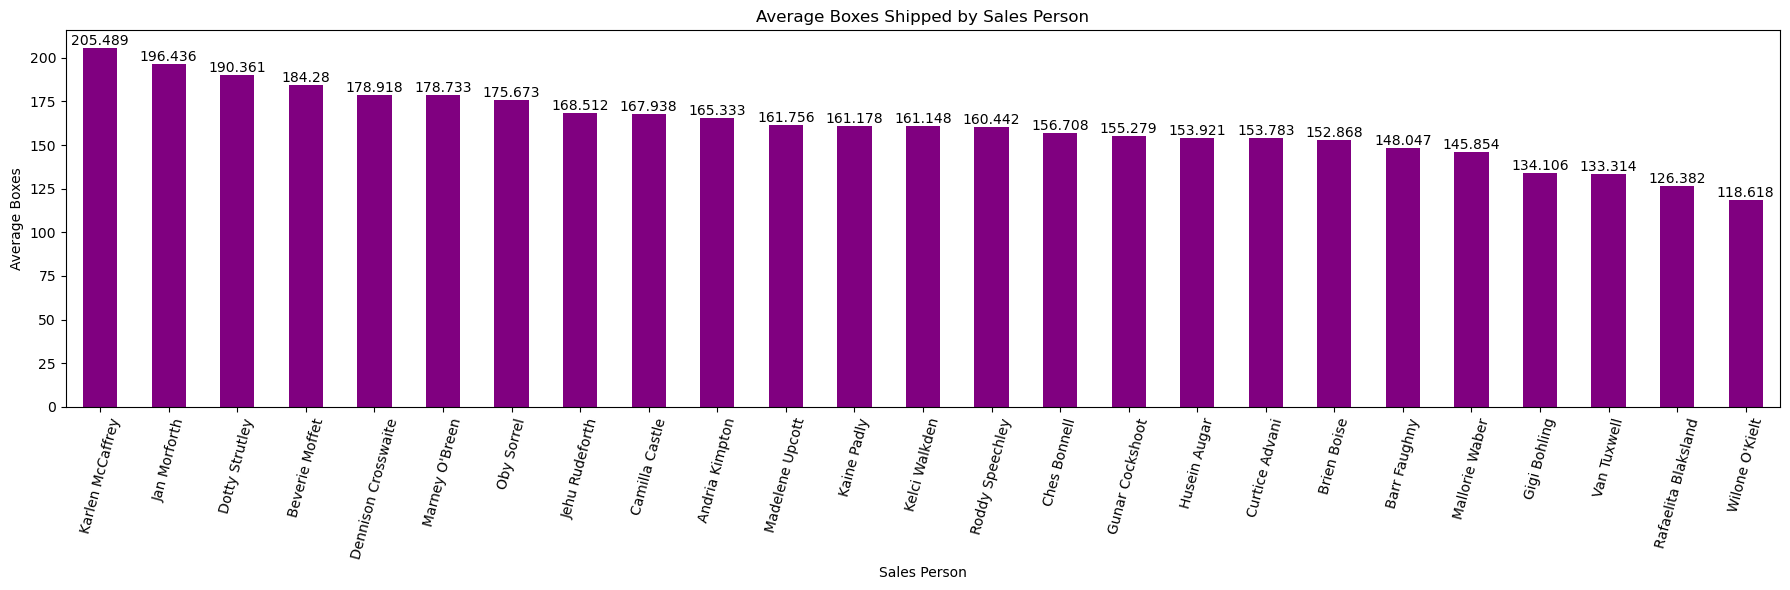

In [29]:
avg_boxes_rep = df.groupby('Sales Person')['Boxes Shipped'].mean().sort_values(ascending=False)

plt.figure(figsize=(18,6))
ax=avg_boxes_rep.plot(kind='bar', color='purple')
plt.title('Average Boxes Shipped by Sales Person')
plt.ylabel('Average Boxes')
plt.xlabel('Sales Person')
plt.xticks(rotation=75)
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

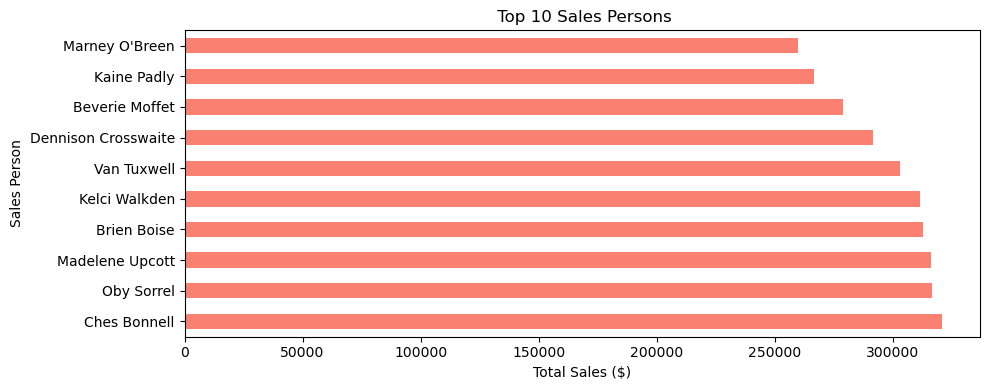

In [55]:
top_salespersons = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)

top_salespersons.plot(kind='barh', figsize=(10,4), color='salmon')
plt.title(' Top 10 Sales Persons')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sales Person')

plt.tight_layout()
plt.show()


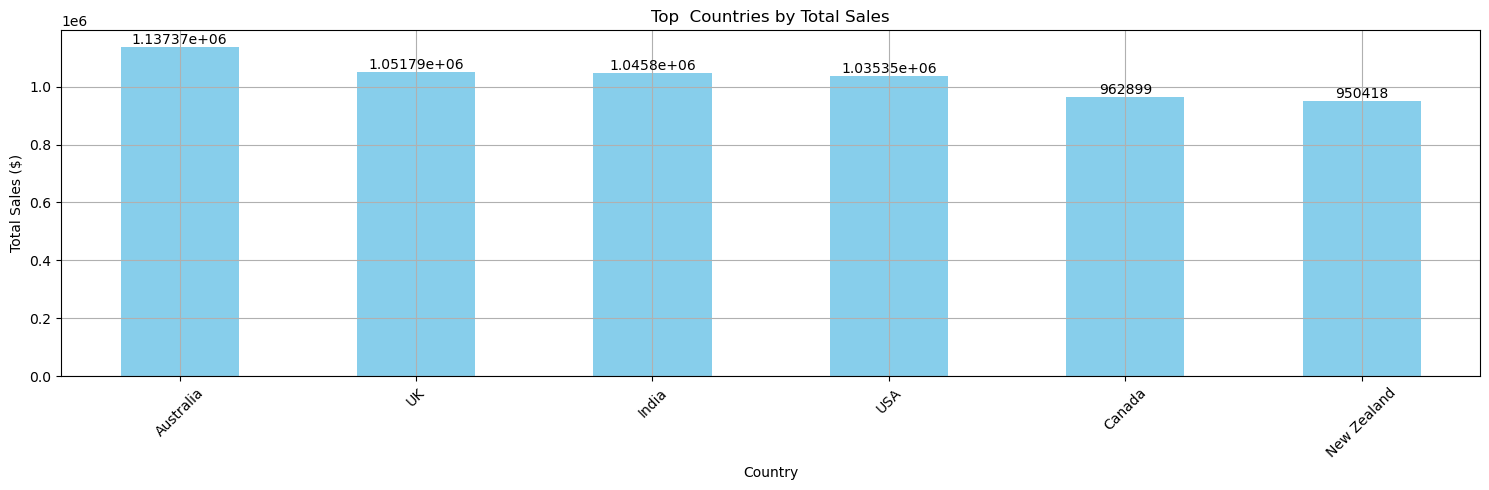

In [51]:
top_countries = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

ax=top_countries.plot(kind='bar', figsize=(15,5), color='skyblue')
plt.title('Top  Countries by Total Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


## Seasonality Analysis – Monthly Sales Trends

### 1. Convert Date column to datetime format

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,2022-05
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,2022-06
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2022-07
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,2022-07


### 2. Create a 'Month' column in Year-Month format

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)  
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,2022-05
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,2022-06
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2022-07
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,2022-07


### 3. Calculate total sales per month

In [33]:
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales

Month
2022-01    896105.0
2022-02    699377.0
2022-03    749483.0
2022-04    674051.0
2022-05    752892.0
2022-06    865144.0
2022-07    803425.0
2022-08    743148.0
Name: Amount, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 60.0+ KB


### 4. Plot monthly sales as a line chart

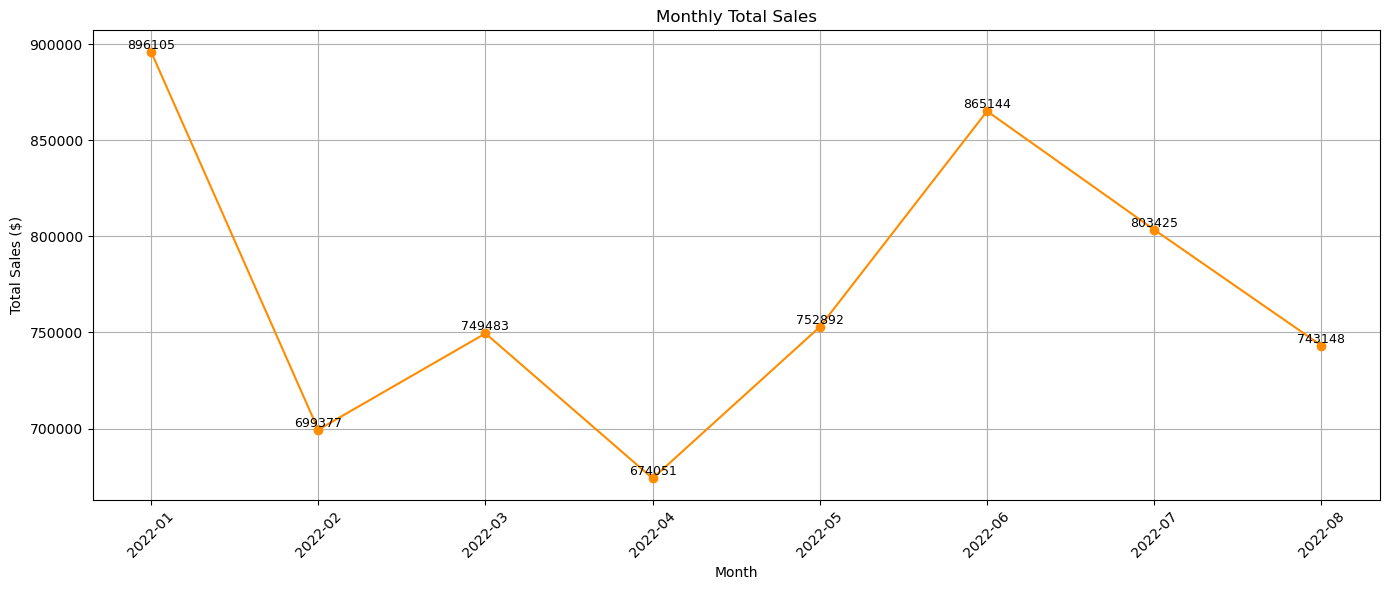

In [58]:
plt.figure(figsize=(14,6))
ax = monthly_sales.plot(marker='o', color='darkorange')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


for i, value in enumerate(monthly_sales):
    ax.text(i, value, f'{value:.0f}', ha='center', va='bottom', fontsize=9)

plt.show()


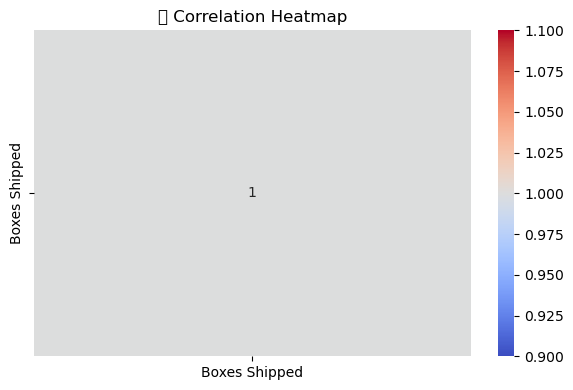

In [60]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("📈 Correlation Heatmap")
plt.tight_layout()
plt.show()


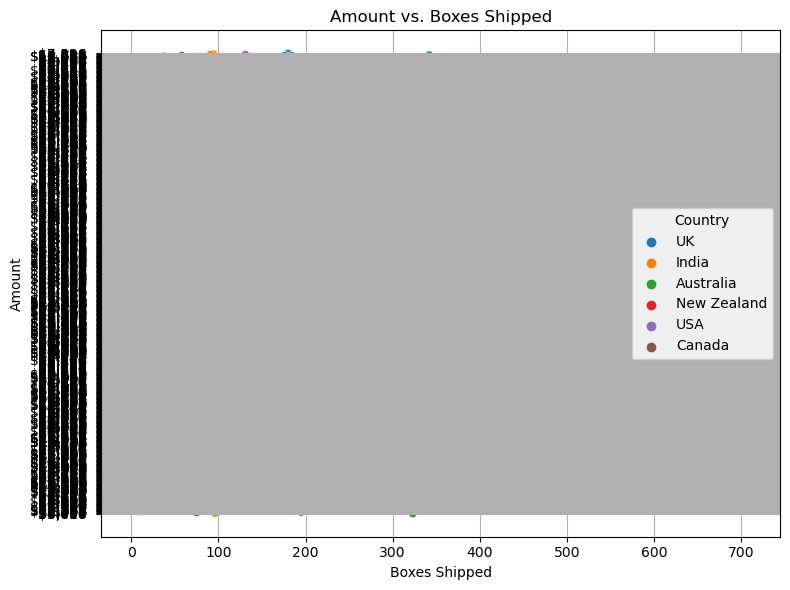

In [64]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', hue='Country')
plt.title('Amount vs. Boxes Shipped')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5)

top_products.plot(kind='bar', figsize=(8,6), color='coral')
plt.title('Top 5 Products by Sales')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: no numeric data to plot